In [ ]:
# import findspark
findspark.init()
findspark.find()

In [2]:
PATH = "C:/data/census-income-4.csv"

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import pandas

In [4]:
from pyspark.sql import SparkSession
spark:SparkSession = SparkSession.builder.appName("Q1").getOrCreate()

In [5]:
## To make some of the headers of an attributes more friendly below will be used next coding:
## 1_age_AAGE
## 2_class of worker_ACLSWKR
## 5_education_AHGA
## 8_marital stat_AMARITL
## 10_major occupation code_AMJOCC
## 11_race_ARACE
## 13_sex_ASEX
## 17_capital gains_CAPGAIN
## 18_capital losses_CAPLOSS
## 6_wage per hour_AHRSPAY
## 36_citizenship_PEFNTVTY

In [6]:
schema = StructType([StructField('AAGE', StringType(), True),
                     StructField('ACLSWKR', StringType(), True),
                     StructField('detailed industry recode', StringType(), True),
                     StructField('detailed occupation recode', StringType(), True),
                     StructField('AHGA', StringType(), True),
                     StructField('AHRSPAY', StringType(), True),
                     StructField('enroll in edu inst last wk', StringType(), True),
                     StructField('AMARITL', StringType(), True),
                     StructField('major industry code', StringType(), True),
                     StructField('AMJOCC', StringType(), True),
                     StructField('ARACE', StringType(), True),
                     StructField('hispanic origin', StringType(), True),
                     StructField('ASEX', StringType(), True),
                     StructField('member of a labor union', StringType(), True),
                     StructField('reason for unemployment', StringType(), True),
                     StructField('full or part time employment stat', StringType(), True),
                     StructField('CAPGAIN', StringType(), True),
                     StructField('CAPLOSS', StringType(), True),
                     StructField('dividends from stocks', StringType(), True),
                     StructField('tax filer stat', StringType(), True),
                     StructField('region of previous residence', StringType(), True),
                     StructField('state of previous residence', StringType(), True),
                     StructField('detailed household and family stat', StringType(), True),
                     StructField('| instance weight', StringType(), True),
                     StructField('instance weight', StringType(), True),
                     StructField('migration code-change in msa', StringType(), True),
                     StructField('migration code-change in reg', StringType(), True),
                     StructField('migration code-move within reg', StringType(), True),
                     StructField('live in this house 1 year ago', StringType(), True),
                     StructField('migration prev res in sunbelt', StringType(), True),
                     StructField('num persons worked for employer', StringType(), True),
                     StructField('family members under 18', StringType(), True),
                     StructField('country of birth father', StringType(), True),
                     StructField('country of birth mother', StringType(), True),
                     StructField('country of birth self', StringType(), True),
                     StructField('PEFNTVTY', StringType(), True),
                     StructField('own business or self employed', StringType(), True),
                     StructField('fill inc questionnaire for veterans admin', StringType(), True),
                     StructField('veterans benefits', StringType(), True),
                     StructField('weeks worked in year', StringType(), True),
                     StructField('year', StringType(), True)])

In [7]:
## I have changed "," on ";" in excel and save file in a .csv formate.

In [8]:
df = spark.read.format("csv")\
    .option("delimiter", ";")\
    .option("header", "false")\
    .option("inferSchema", True)\
    .schema(schema)\
    .load(PATH)
df.show(5)

+----+--------------------+------------------------+--------------------------+--------------------+-------+--------------------------+--------------+--------------------+--------------------+--------------------+---------------+-------+-----------------------+-----------------------+---------------------------------+-------+-------+---------------------+------------------+----------------------------+---------------------------+----------------------------------+--------------------+---------------+----------------------------+----------------------------+------------------------------+-----------------------------+-----------------------------+-------------------------------+-----------------------+-----------------------+-----------------------+---------------------+--------------------+-----------------------------+-----------------------------------------+-----------------+--------------------+----+
|AAGE|             ACLSWKR|detailed industry recode|detailed occupation recode|   

In [9]:
## Q1 - 3. Print the data Schema, Summary, # of columns and # of rows.

In [10]:
df.printSchema()

root
 |-- AAGE: string (nullable = true)
 |-- ACLSWKR: string (nullable = true)
 |-- detailed industry recode: string (nullable = true)
 |-- detailed occupation recode: string (nullable = true)
 |-- AHGA: string (nullable = true)
 |-- AHRSPAY: string (nullable = true)
 |-- enroll in edu inst last wk: string (nullable = true)
 |-- AMARITL: string (nullable = true)
 |-- major industry code: string (nullable = true)
 |-- AMJOCC: string (nullable = true)
 |-- ARACE: string (nullable = true)
 |-- hispanic origin: string (nullable = true)
 |-- ASEX: string (nullable = true)
 |-- member of a labor union: string (nullable = true)
 |-- reason for unemployment: string (nullable = true)
 |-- full or part time employment stat: string (nullable = true)
 |-- CAPGAIN: string (nullable = true)
 |-- CAPLOSS: string (nullable = true)
 |-- dividends from stocks: string (nullable = true)
 |-- tax filer stat: string (nullable = true)
 |-- region of previous residence: string (nullable = true)
 |-- state of

In [11]:
row=df.count()
print(f'Number of Rows are: {row}')

Number of Rows are: 199523


In [12]:
col=len(df.columns)
print(f'Number of Columns are: {col}')

Number of Columns are: 41


In [13]:
df.summary().show(5)

+-------+------------------+-------------------+------------------------+--------------------------+-----------+------------------+--------------------------+---------+-------------------+--------------------+--------------------+---------------+-------+-----------------------+-----------------------+---------------------------------+------------------+------------------+---------------------+------------------+----------------------------+---------------------------+----------------------------------+------------------+------------------+----------------------------+----------------------------+------------------------------+-----------------------------+-----------------------------+-------------------------------+-----------------------+-----------------------+-----------------------+---------------------+--------------------+-----------------------------+-----------------------------------------+------------------+--------------------+-----------------+
|summary|              AAGE|

In [14]:
## To make some of the headers of an attributes more use friendly below will be used next coding:
## 1_age_AAGE
## 2_class of worker_ACLSWKR
## 5_education_AHGA
## 8_marital stat_AMARITL
## 10_major occupation code_AMJOCC
## 11_race_ARACE
## 13_sex_ASEX
## 17_capital gains_CAPGAIN
## 18_capital losses_CAPLOSS
## 6_wage per hour_AHRSPAY
## 36_citizenship_PEFNTVTY

In [15]:
## To make summary more readable I have choosen to select most significant columns.

In [16]:
## df1:
## 1_age_AAGE
## 2_class of worker_ACLSWKR
## 5_education_AHGA
## 8_marital stat_AMARITL

In [17]:
df1=df.select("AAGE", "ACLSWKR", "AHGA", "AMARITL").show(5)

+----+--------------------+--------------------+--------------+
|AAGE|             ACLSWKR|                AHGA|       AMARITL|
+----+--------------------+--------------------+--------------+
|  73|     Not in universe| High school grad...|       Widowed|
|  58| Self-employed-no...| Some college but...|      Divorced|
|  18|     Not in universe|          10th grade| Never married|
|   9|     Not in universe|            Children| Never married|
|  10|     Not in universe|            Children| Never married|
+----+--------------------+--------------------+--------------+
only showing top 5 rows



In [18]:
## df2:
## 10_major occupation code_AMJOCC
## 11_race_ARACE
## 13_sex_ASEX

In [19]:
df2=df.select("AMJOCC", "ARACE", "ASEX").show(5)

+--------------------+--------------------+-------+
|              AMJOCC|               ARACE|   ASEX|
+--------------------+--------------------+-------+
|     Not in universe|               White| Female|
| Precision produc...|               White|   Male|
|     Not in universe| Asian or Pacific...| Female|
|     Not in universe|               White| Female|
|     Not in universe|               White| Female|
+--------------------+--------------------+-------+
only showing top 5 rows



In [20]:
## df3:
## 17_capital gains_CAPGAIN
## 18_capital losses_CAPLOSS
## 6_wage per hour_AHRSPAY
## 36_citizenship_PEFNTVTY

In [21]:
df3=df.select("CAPGAIN", "CAPLOSS", "AHRSPAY", "PEFNTVTY").show(5)

+-------+-------+-------+--------------------+
|CAPGAIN|CAPLOSS|AHRSPAY|            PEFNTVTY|
+-------+-------+-------+--------------------+
|      0|      0|      0| Native- Born in ...|
|      0|      0|      0| Native- Born in ...|
|      0|      0|      0| Foreign born- No...|
|      0|      0|      0| Native- Born in ...|
|      0|      0|      0| Native- Born in ...|
+-------+-------+-------+--------------------+
only showing top 5 rows



In [22]:
## The data Schema of choosen columns.

In [23]:
## df1:
## 1_age_AAGE
## 2_class of worker_ACLSWKR
## 5_education_AHGA
## 8_marital stat_AMARITL

In [24]:
df1=df.select("AAGE", "ACLSWKR", "AHGA", "AMARITL").printSchema()

root
 |-- AAGE: string (nullable = true)
 |-- ACLSWKR: string (nullable = true)
 |-- AHGA: string (nullable = true)
 |-- AMARITL: string (nullable = true)



In [25]:
## df2:
## 10_major occupation code_AMJOCC
## 11_race_ARACE
## 13_sex_ASEX

In [26]:
df2=df.select("AMJOCC", "ARACE", "ASEX").printSchema()

root
 |-- AMJOCC: string (nullable = true)
 |-- ARACE: string (nullable = true)
 |-- ASEX: string (nullable = true)



In [27]:
## df3:
## 17_capital gains_CAPGAIN
## 18_capital losses_CAPLOSS
## 6_wage per hour_AHRSPAY
## 36_citizenship_PEFNTVTY

In [28]:
df3=df.select("CAPGAIN", "CAPLOSS", "AHRSPAY", "PEFNTVTY").printSchema()

root
 |-- CAPGAIN: string (nullable = true)
 |-- CAPLOSS: string (nullable = true)
 |-- AHRSPAY: string (nullable = true)
 |-- PEFNTVTY: string (nullable = true)



In [29]:
## The summary of choosen columns.

In [30]:
## df1:
## 1_age_AAGE
## 2_class of worker_ACLSWKR
## 5_education_AHGA
## 8_marital stat_AMARITL

In [31]:
df1=df.select("AAGE", "ACLSWKR", "AHGA", "AMARITL").summary().show(10)

+-------+------------------+-------------------+--------------------+---------+
|summary|              AAGE|            ACLSWKR|                AHGA|  AMARITL|
+-------+------------------+-------------------+--------------------+---------+
|  count|            199523|             199523|              199523|   199523|
|   mean|34.494198663813194|               null|                null|     null|
| stddev|22.310895206650294|               null|                null|     null|
|    min|                 0| Federal government|          10th grade| Divorced|
|    25%|              15.0|               null|                null|     null|
|    50%|              33.0|               null|                null|     null|
|    75%|              50.0|               null|                null|     null|
|    max|                90|        Without pay| Some college but...|  Widowed|
+-------+------------------+-------------------+--------------------+---------+



In [32]:
## df2:
## 10_major occupation code_AMJOCC
## 11_race_ARACE
## 13_sex_ASEX

In [33]:
df2=df.select("AMJOCC", "ARACE", "ASEX").summary().show(10)

+-------+--------------------+--------------------+-------+
|summary|              AMJOCC|               ARACE|   ASEX|
+-------+--------------------+--------------------+-------+
|  count|              199523|              199523| 199523|
|   mean|                null|                null|   null|
| stddev|                null|                null|   null|
|    min| Adm support incl...| Amer Indian Aleu...| Female|
|    25%|                null|                null|   null|
|    50%|                null|                null|   null|
|    75%|                null|                null|   null|
|    max| Transportation a...|               White|   Male|
+-------+--------------------+--------------------+-------+



In [34]:
## df3:
## 17_capital gains_17-CAPGAIN
## 18_capital losses_18-CAPLOSS
## 6_wage per hour_6-AHRSPAY
## 36_citizenship_36-PEFNTVTY

In [35]:
df3=df.select("CAPGAIN", "CAPLOSS", "AHRSPAY", "PEFNTVTY").summary().show(10)

+-------+------------------+------------------+------------------+--------------------+
|summary|           CAPGAIN|           CAPLOSS|           AHRSPAY|            PEFNTVTY|
+-------+------------------+------------------+------------------+--------------------+
|  count|            199523|            199523|            199523|              199523|
|   mean| 434.7189897906507|37.313788385298935|55.426908175999756|                null|
| stddev|4697.5312797125325|271.89642836496455|274.89645390284204|                null|
|    min|                 0|                 0|                 0| Foreign born- No...|
|    25%|               0.0|               0.0|               0.0|                null|
|    50%|               0.0|               0.0|               0.0|                null|
|    75%|               0.0|               0.0|               0.0|                null|
|    max|             99999|               974|              9999| Native- Born in ...|
+-------+------------------+----

In [36]:
## Q1 - 4. Print a table that distinct values of all columns.

In [37]:
df.distinct().show(5)

+----+--------------------+------------------------+--------------------------+--------------------+-------+--------------------------+--------------------+--------------------+--------------------+--------------------+---------------+-------+-----------------------+-----------------------+---------------------------------+-------+-------+---------------------+--------------------+----------------------------+---------------------------+----------------------------------+--------------------+---------------+----------------------------+----------------------------+------------------------------+-----------------------------+-----------------------------+-------------------------------+-----------------------+-----------------------+-----------------------+---------------------+--------------------+-----------------------------+-----------------------------------------+-----------------+--------------------+----+
|AAGE|             ACLSWKR|detailed industry recode|detailed occupation re

In [38]:
## Q1 - 4-1. Printing a table that distinct values of all columns one by one columns for better illustration. (optional)

In [39]:
df.columns

['AAGE',
 'ACLSWKR',
 'detailed industry recode',
 'detailed occupation recode',
 'AHGA',
 'AHRSPAY',
 'enroll in edu inst last wk',
 'AMARITL',
 'major industry code',
 'AMJOCC',
 'ARACE',
 'hispanic origin',
 'ASEX',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'CAPGAIN',
 'CAPLOSS',
 'dividends from stocks',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 '| instance weight',
 'instance weight',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'num persons worked for employer',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'PEFNTVTY',
 'own business or self employed',
 'fill inc questionnaire for veterans admin',
 'veterans benefits',
 'weeks worked in year',
 'year']

In [40]:
## The table in distinct values - Part 1.
## 1_age_AAGE
## 2_class of worker_ACLSWKR
## 5_education_AHGA
## 8_marital stat_AMARITL

In [41]:
df.select('AAGE').distinct().sort(asc('AAGE')).show(100)
df.select('ACLSWKR').distinct().sort(asc('ACLSWKR')).show(100)
df.select('AHGA').distinct().sort(asc('AHGA')).show()
df.select('AMARITL').distinct().sort(asc('AMARITL')).show()
df.select('AMJOCC').distinct().sort(asc('AMJOCC')).show()
df.select('ARACE').distinct().sort(asc('ARACE')).show()
df.select('ASEX').distinct().sort(asc('ASEX')).show()
df.select('CAPGAIN').distinct().sort(asc('CAPGAIN')).show()
df.select('CAPLOSS').distinct().sort(asc('CAPLOSS')).show()
df.select('AHRSPAY').distinct().sort(asc('AHRSPAY')).show()
df.select('PEFNTVTY').distinct().sort(asc('PEFNTVTY')).show()


+----+
|AAGE|
+----+
|   0|
|   1|
|  10|
|  11|
|  12|
|  13|
|  14|
|  15|
|  16|
|  17|
|  18|
|  19|
|   2|
|  20|
|  21|
|  22|
|  23|
|  24|
|  25|
|  26|
|  27|
|  28|
|  29|
|   3|
|  30|
|  31|
|  32|
|  33|
|  34|
|  35|
|  36|
|  37|
|  38|
|  39|
|   4|
|  40|
|  41|
|  42|
|  43|
|  44|
|  45|
|  46|
|  47|
|  48|
|  49|
|   5|
|  50|
|  51|
|  52|
|  53|
|  54|
|  55|
|  56|
|  57|
|  58|
|  59|
|   6|
|  60|
|  61|
|  62|
|  63|
|  64|
|  65|
|  66|
|  67|
|  68|
|  69|
|   7|
|  70|
|  71|
|  72|
|  73|
|  74|
|  75|
|  76|
|  77|
|  78|
|  79|
|   8|
|  80|
|  81|
|  82|
|  83|
|  84|
|  85|
|  86|
|  87|
|  88|
|  89|
|   9|
|  90|
+----+

+--------------------+
|             ACLSWKR|
+--------------------+
|  Federal government|
|    Local government|
|        Never worked|
|     Not in universe|
|             Private|
| Self-employed-in...|
| Self-employed-no...|
|    State government|
|         Without pay|
+--------------------+

+--------------------+
|          

In [42]:
## Q1 - 5. Make exploratory data analysis and visualize your findings from data.

In [43]:
## Calculations of the most significant columns in the table. 

In [44]:
## The numbers of people of each age.
df.select('AAGE').groupBy('AAGE').count().sort(asc('AAGE')).show(100)
df.select('ACLSWKR').groupBy('ACLSWKR').count().sort(asc('ACLSWKR')).show(100)
df.select('AHGA').groupBy('AHGA').count().sort(asc('AHGA')).show(100)
df.select('AMARITL').groupBy('AMARITL').count().sort(asc('AMARITL')).show(100)
df.select('AMJOCC').groupBy('AMJOCC').count().sort(asc('AMJOCC')).show(100)
df.select('ARACE').groupBy('ARACE').count().sort(asc('ARACE')).show(100)
df.select('ASEX').groupBy('ASEX').count().sort(asc('ASEX')).show(100)
df.select('CAPGAIN').groupBy('CAPGAIN').count().sort(asc('CAPGAIN')).show(100)
df.select('CAPLOSS').groupBy('CAPLOSS').count().sort(asc('CAPLOSS')).show(100)
df.select('AHRSPAY').groupBy('AHRSPAY').count().sort(asc('AHRSPAY')).show(100)
df.select('PEFNTVTY').groupBy('PEFNTVTY').count().sort(asc('PEFNTVTY')).show(100)

+----+-----+
|AAGE|count|
+----+-----+
|   0| 2839|
|   1| 3138|
|  10| 3134|
|  11| 3128|
|  12| 3060|
|  13| 3152|
|  14| 3068|
|  15| 2926|
|  16| 2882|
|  17| 2762|
|  18| 2484|
|  19| 2419|
|   2| 3236|
|  20| 2390|
|  21| 2386|
|  22| 2573|
|  23| 2789|
|  24| 2783|
|  25| 2783|
|  26| 2714|
|  27| 2758|
|  28| 3013|
|  29| 3050|
|   3| 3279|
|  30| 3203|
|  31| 3351|
|  32| 3188|
|  33| 3340|
|  34| 3489|
|  35| 3450|
|  36| 3353|
|  37| 3278|
|  38| 3277|
|  39| 3144|
|   4| 3318|
|  40| 3114|
|  41| 3134|
|  42| 2995|
|  43| 2889|
|  44| 2786|
|  45| 2847|
|  46| 2816|
|  47| 2795|
|  48| 2410|
|  49| 2142|
|   5| 3332|
|  50| 2214|
|  51| 2215|
|  52| 2115|
|  53| 1900|
|  54| 1745|
|  55| 1730|
|  56| 1710|
|  57| 1622|
|  58| 1600|
|  59| 1580|
|   6| 3171|
|  60| 1560|
|  61| 1497|
|  62| 1531|
|  63| 1501|
|  64| 1579|
|  65| 1550|
|  66| 1443|
|  67| 1496|
|  68| 1436|
|  69| 1412|
|   7| 3218|
|  70| 1410|
|  71| 1418|
|  72| 1315|
|  73| 1354|
|  74| 1227|
|  75| 1065|

In [45]:
## For future enhansmante of visualisation I would used scaling of axes or grouping data by categories (0-5, 6-18, 19-35 ...). 
## unfortunatly I did not ahve a enoughe time to learn how to do it by pyspark

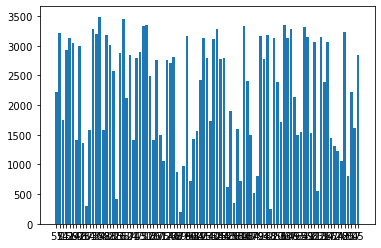

In [46]:
dfPlot=df.groupBy("AAGE").count()

x=dfPlot.toPandas()["AAGE"].values.tolist()
y=dfPlot.toPandas()["count"].values.tolist()

plt.bar(x,y)
plt.show()

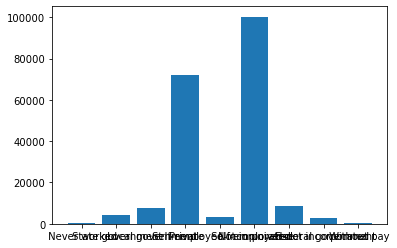

In [47]:
dfPlot=df.groupBy("ACLSWKR").count()

x=dfPlot.toPandas()["ACLSWKR"].values.tolist()
y=dfPlot.toPandas()["count"].values.tolist()

plt.bar(x,y)
plt.show()